In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
fashion_mnist= tf.keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train, X_test = X_train/255.0, X_test/255.0

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test,-1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
K = len(set(y_train))
K

10

In [9]:
# building functional model

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0,2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)
model = Model(i,x)

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 12)

Epoch 1/12
1875/1875 [==============================] - 45s 23ms/step - loss: 0.5076 - accuracy: 0.8125 - val_loss: 0.3959 - val_accuracy: 0.8560
Epoch 2/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3489 - accuracy: 0.8685 - val_loss: 0.3483 - val_accuracy: 0.8683
Epoch 3/12
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2976 - accuracy: 0.8881 - val_loss: 0.3382 - val_accuracy: 0.8781
Epoch 4/12
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2592 - accuracy: 0.9028 - val_loss: 0.3041 - val_accuracy: 0.8895
Epoch 5/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2285 - accuracy: 0.9143 - val_loss: 0.2971 - val_accuracy: 0.8945
Epoch 6/12
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2002 - accuracy: 0.9243 - val_loss: 0.3212 - val_accuracy: 0.8918
Epoch 7/12
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1790 - accuracy: 0.9310 - val_loss: 0.3350 -

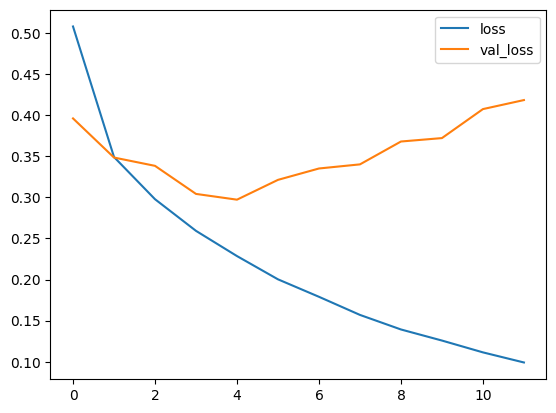

In [11]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

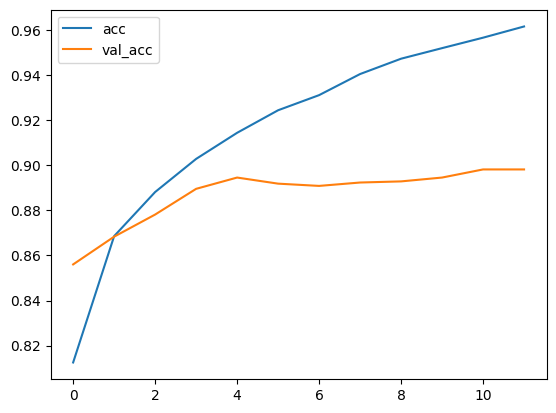

In [12]:
plt.plot(r.history['accuracy'], label = "acc")
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()